# Predict House Pricing
* Predict house price using regression

<img src="images/home-prices.jpg">

## Dataset - House Sales in King County, USA
* **source:** https://www.kaggle.com/harlfoxem/housesalesprediction
* This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.
* It's a great dataset for evaluating simple regression models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house_df = pd.read_csv("datasets/kc_house_data.csv")

house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
house_df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17852,6791200120,20150407T000000,515000.0,3,2.25,1820,13362,1.0,0,0,...,8,1220,600,1977,0,98075,47.5898,-122.052,2050,15000
13573,1251200155,20140911T000000,1000000.0,4,3.50,2990,4200,2.0,0,4,...,9,2000,990,1925,0,98144,47.5930,-122.289,2390,4200
18078,7708250040,20150212T000000,363000.0,3,2.50,2390,8000,2.0,0,0,...,8,2390,0,1995,0,98042,47.3895,-122.154,2070,7585
5098,1775930440,20140623T000000,479000.0,3,2.25,2110,11319,2.0,0,0,...,8,2110,0,1978,0,98072,47.7420,-122.105,1860,11319
21315,6056100293,20141110T000000,440000.0,3,2.50,1650,4929,2.0,0,0,...,7,1520,130,2007,0,98108,47.5634,-122.298,1520,2287


In [4]:
house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
house_df.shape

(21613, 21)

In [6]:
house_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
# Missing value control
missing_val_count_by_column = (house_df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


In [8]:
# Missing value control
house_df.isnull().values.any()

False

In [9]:
# Drop unnecessary columns
house_df.drop(["id","date"], axis=1, inplace=True)

In [10]:
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


In [12]:
house_df.drop(["zipcode"], axis=1, inplace=True)

In [13]:
house_df_corr = house_df.corr()
house_df_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.114084,0.198372,0.713202,0.119248


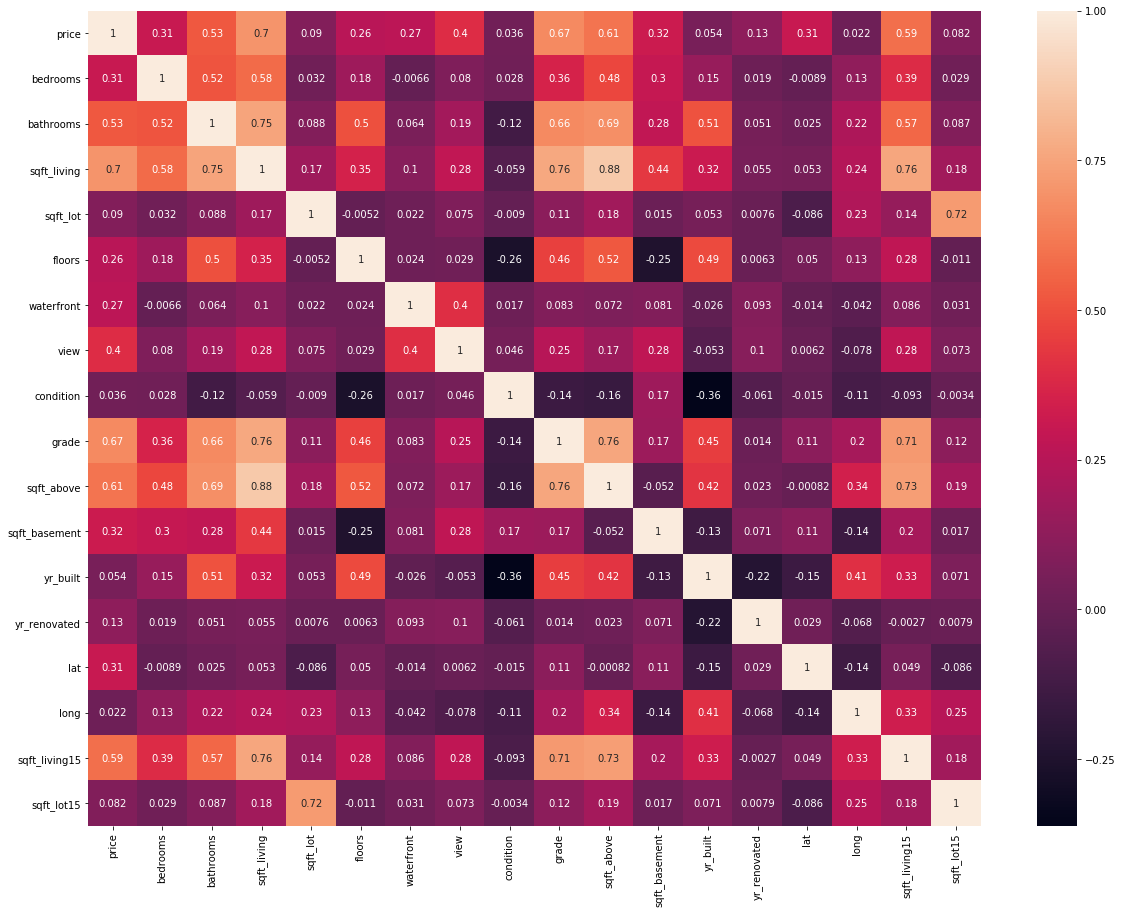

In [14]:
plt.subplots(figsize=(20,15))
ax = sns.heatmap(house_df_corr, annot=True)

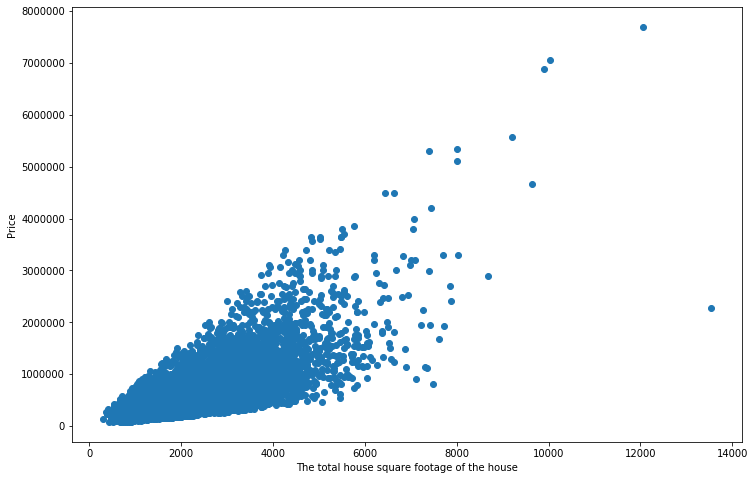

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(house_df['sqft_living'], house_df['price'])

plt.xlabel('The total house square footage of the house')
plt.ylabel('Price')
plt.show()

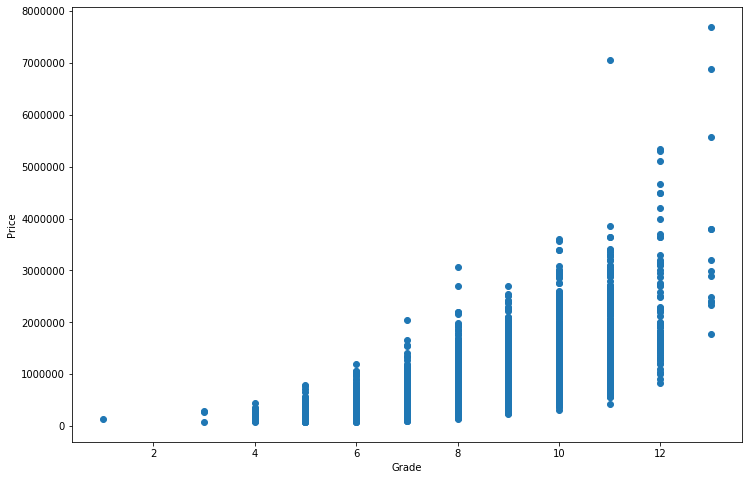

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(house_df['grade'], house_df['price'])

plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

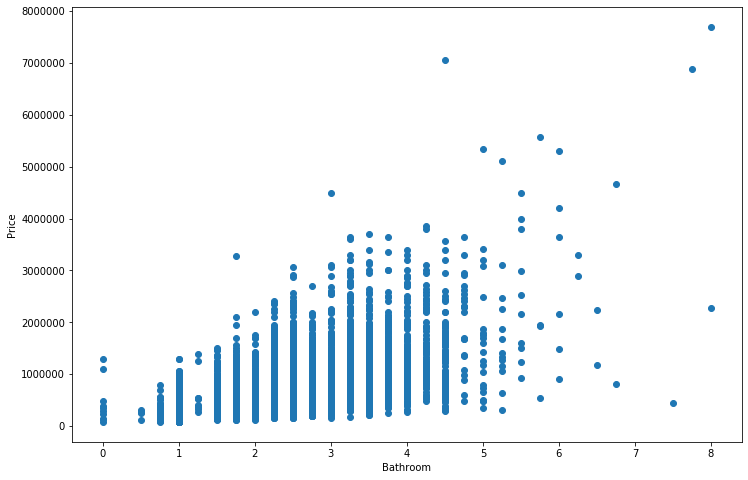

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(house_df['bathrooms'], house_df['price'])

plt.xlabel('Bathroom')
plt.ylabel('Price')
plt.show()

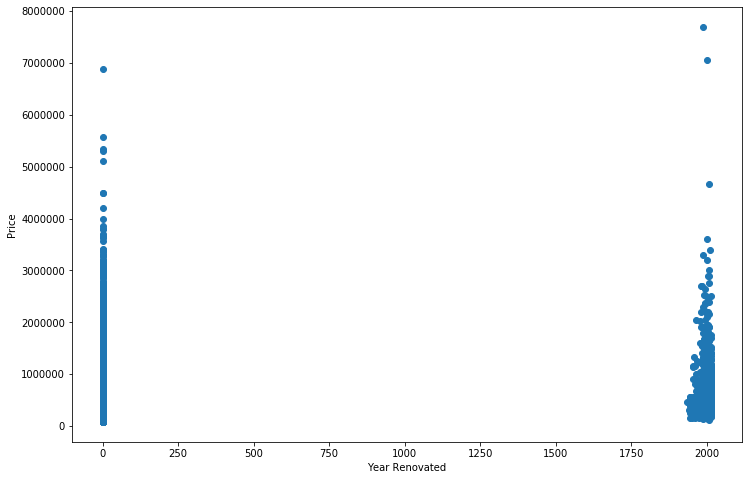

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(house_df['yr_renovated'], house_df['price'])

plt.xlabel('Year Renovated')
plt.ylabel('Price')
plt.show()

In [19]:
house_df["yr_built"]

0        1955
1        1951
2        1933
3        1965
4        1987
5        2001
6        1995
7        1963
8        1960
9        2003
10       1965
11       1942
12       1927
13       1977
14       1900
15       1979
16       1994
17       1916
18       1921
19       1969
20       1947
21       1968
22       1995
23       1985
24       1985
25       1941
26       1915
27       1909
28       1948
29       2005
         ... 
21583    1943
21584    2007
21585    2009
21586    2009
21587    2006
21588    2007
21589    2010
21590    2007
21591    2014
21592    2008
21593    2006
21594    2008
21595    2006
21596    2014
21597    2007
21598    2014
21599    2003
21600    2008
21601    2008
21602    2014
21603    2003
21604    2014
21605    2014
21606    2009
21607    2008
21608    2009
21609    2014
21610    2009
21611    2004
21612    2008
Name: yr_built, Length: 21613, dtype: int64

In [20]:
import datetime

house_df['house_age'] = datetime.datetime.now().year - pd.to_numeric(house_df['yr_built'])

In [21]:
house_df["house_age"]

0         65
1         69
2         87
3         55
4         33
5         19
6         25
7         57
8         60
9         17
10        55
11        78
12        93
13        43
14       120
15        41
16        26
17       104
18        99
19        51
20        73
21        52
22        25
23        35
24        35
25        79
26       105
27       111
28        72
29        15
        ... 
21583     77
21584     13
21585     11
21586     11
21587     14
21588     13
21589     10
21590     13
21591      6
21592     12
21593     14
21594     12
21595     14
21596      6
21597     13
21598      6
21599     17
21600     12
21601     12
21602      6
21603     17
21604      6
21605      6
21606     11
21607     12
21608     11
21609      6
21610     11
21611     16
21612     12
Name: house_age, Length: 21613, dtype: int64

In [22]:
house_df.drop(['yr_built'], axis=1, inplace=True)

In [23]:
house_df.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15,house_age
21547,327000.0,2,2.00,1490,1627,2.0,0,0,3,8,1190,300,0,47.5455,-122.375,1400,1498,11
14167,619000.0,4,1.75,1660,3800,1.5,0,0,3,7,1660,0,0,47.6883,-122.314,1660,3767,94
18587,250200.0,3,1.50,1180,7384,1.0,0,0,5,7,1180,0,0,47.3838,-122.287,1150,7455,61
5293,1315000.0,4,3.50,3460,3997,2.0,0,0,3,10,2560,900,0,47.6718,-122.329,1860,4000,16
14395,425000.0,3,2.50,1230,23522,1.0,0,0,4,7,1230,0,0,47.5150,-122.162,2340,23522,42


In [24]:
house_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'house_age'],
      dtype='object')

In [25]:
house_df["yr_renovated"]

0           0
1        1991
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
11          0
12          0
13          0
14          0
15          0
16          0
17          0
18          0
19          0
20          0
21          0
22          0
23          0
24          0
25          0
26          0
27          0
28          0
29          0
         ... 
21583       0
21584       0
21585       0
21586       0
21587       0
21588       0
21589       0
21590       0
21591       0
21592       0
21593       0
21594       0
21595       0
21596       0
21597       0
21598       0
21599       0
21600       0
21601       0
21602       0
21603       0
21604       0
21605       0
21606       0
21607       0
21608       0
21609       0
21610       0
21611       0
21612       0
Name: yr_renovated, Length: 21613, dtype: int64

In [26]:
house_df.drop(['yr_renovated'], axis=1, inplace=True)

In [27]:
house_df = house_df.sample(frac=1).reset_index(drop=True) #veri setini shuffle etti(karıştırdı)

house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,house_age
0,470000.0,3,2.25,1780,8784,1.0,0,0,3,7,1230,550,47.7010,-122.172,1780,7704,43
1,780000.0,4,1.75,2480,9195,1.0,0,0,3,7,1390,1090,47.5840,-122.195,2440,9195,70
2,325088.0,4,1.00,1400,6739,1.0,0,0,3,7,1000,400,47.5402,-122.298,1500,6380,66
3,378000.0,3,2.50,2130,8404,2.0,0,0,3,8,2130,0,47.4623,-122.130,2130,8404,29
4,600000.0,3,2.50,4930,77536,2.0,0,0,3,9,3930,1000,47.7634,-122.139,2760,7351,39


In [28]:
house_df.shape

(21613, 17)

In [29]:
from sklearn import preprocessing

house_df[['sqft_living']] = preprocessing.scale(house_df[['sqft_living']].astype('float64'))
house_df[['sqft_lot']] = preprocessing.scale(house_df[['sqft_lot']].astype('float64'))
house_df[['sqft_above']] = preprocessing.scale(house_df[['sqft_above']].astype('float64'))
house_df[['sqft_basement']] = preprocessing.scale(house_df[['sqft_basement']].astype('float64'))
house_df[['sqft_lot15']] = preprocessing.scale(house_df[['sqft_lot15']].astype('float64'))
house_df[['sqft_living15']] = preprocessing.scale(house_df[['sqft_living15']].astype('float64'))


In [30]:
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,house_age
0,470000.0,3,2.25,-0.326539,-0.152657,1.0,0,0,3,7,-0.674326,0.584075,47.7010,-122.172,-0.301371,-0.185487,43
1,780000.0,4,1.75,0.435640,-0.142734,1.0,0,0,3,7,-0.481106,1.804235,47.5840,-122.195,0.661605,-0.130879,70
2,325088.0,4,1.00,-0.740293,-0.202029,1.0,0,0,3,7,-0.952080,0.245141,47.5402,-122.298,-0.709907,-0.233979,66
3,378000.0,3,2.50,0.054551,-0.161831,2.0,0,0,3,8,0.412536,-0.658681,47.4623,-122.130,0.209298,-0.159849,29
4,600000.0,3,2.50,3.103266,1.507236,2.0,0,0,3,9,2.586260,1.600875,47.7634,-122.139,1.128502,-0.198416,39


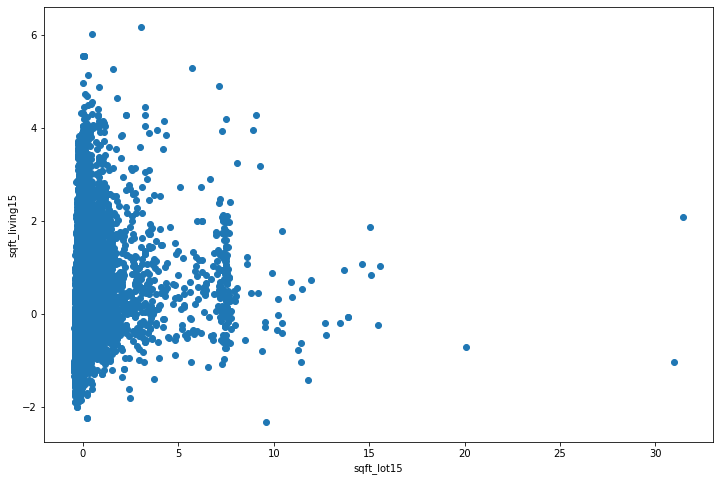

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(house_df['sqft_lot15'], house_df['sqft_living15'])

plt.xlabel('sqft_lot15')
plt.ylabel('sqft_living15')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

X = house_df.drop("price", axis = 1)
y = house_df["price"]

In [33]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,house_age
0,3,2.25,-0.326539,-0.152657,1.0,0,0,3,7,-0.674326,0.584075,47.7010,-122.172,-0.301371,-0.185487,43
1,4,1.75,0.435640,-0.142734,1.0,0,0,3,7,-0.481106,1.804235,47.5840,-122.195,0.661605,-0.130879,70
2,4,1.00,-0.740293,-0.202029,1.0,0,0,3,7,-0.952080,0.245141,47.5402,-122.298,-0.709907,-0.233979,66
3,3,2.50,0.054551,-0.161831,2.0,0,0,3,8,0.412536,-0.658681,47.4623,-122.130,0.209298,-0.159849,29
4,3,2.50,3.103266,1.507236,2.0,0,0,3,9,2.586260,1.600875,47.7634,-122.139,1.128502,-0.198416,39


In [34]:
y.head()

0    470000.0
1    780000.0
2    325088.0
3    378000.0
4    600000.0
Name: price, dtype: float64

In [35]:
print(X.shape)
print(y.shape)

(21613, 16)
(21613,)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=28)

In [37]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(X_train, y_train)

In [38]:
y_pred = linear_model.predict(X_test)


In [40]:
training_score = linear_model.score(X_train, y_train)
test_score = linear_model.score(X_test, y_test)
print("training score: ", training_score)
print("test score: ", test_score)

training score:  0.6957732557485645
test score:  0.6905974253946592


In [41]:
from sklearn.metrics import r2_score

print('test score: ', r2_score(y_test, y_pred))

test score:  0.6905974253946592


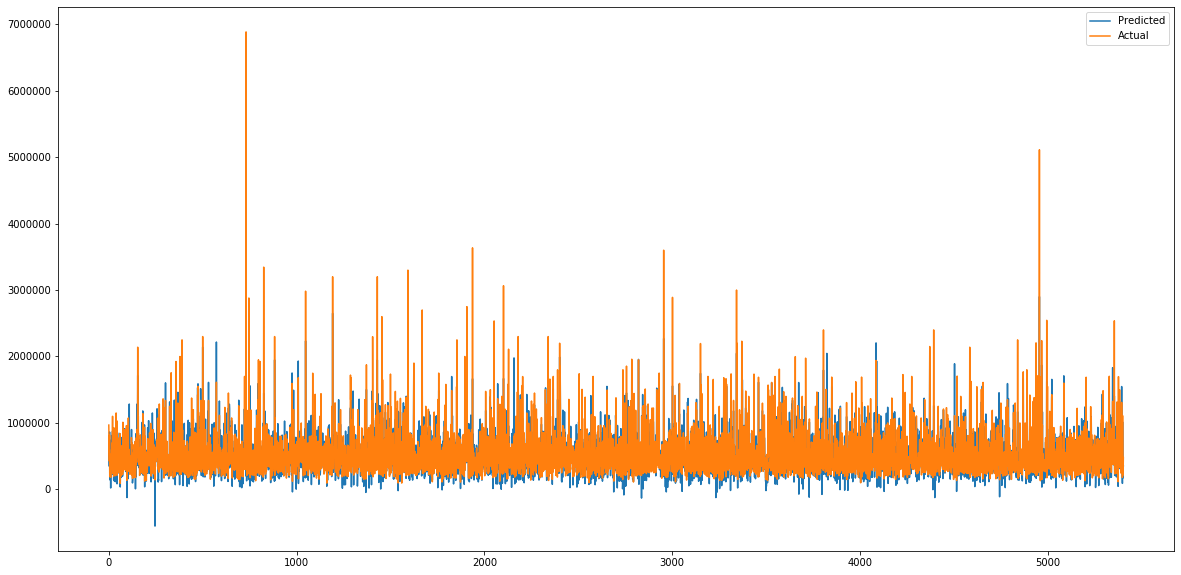

In [42]:
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')


plt.legend()
plt.show()

In [43]:
linear_model.coef_

array([ -35062.95976858,   45020.30339196,   83151.25292317,
          2408.08526762,    1627.35506448,  626384.65572502,
         44721.63283831,   29928.78120485,   99396.5340082 ,
         76901.94495398,   28667.916899  ,  552398.6714054 ,
       -118726.04147   ,   18449.85917818,   -9322.15842344,
          2638.70229682])

In [44]:
linear_model.intercept_

-41227967.7435747